# Adult Income Prediction Project

## Overview
This notebook demonstrates a complete machine learning workflow for predicting whether an individual's annual income exceeds $50K using the UCI Adult Census dataset. We will:

1. **Import necessary libraries** and set up the environment (including Streamlit for web app)
2. **Load and explore the data**: Basic info, statistics, distributions, correlations, and visualizations
3. **Preprocess the data**: Handle missing values, encode categorical features, engineer new features , normalize, remove outliers, and save processed data
4. **Train and evaluate classifiers**: Implement Logistic Regression, KNN, SVM, Decision Tree, and Random Forest; compute metrics (Accuracy, Precision, Recall, F1, AUC-ROC); visualize confusion matrices, ROC curves, and feature importances
5. **Develop an interactive web app**: Use Streamlit for model comparison, predictions, SHAP explanations, and detailed analysis (confusion matrices, reports, precision-recall curves)

## Key Concepts Demonstrated
- Data loading from URL and CSV handling
- Exploratory Data Analysis (EDA) with Pandas, Seaborn, and Matplotlib
- Feature engineering: Combining capital gain/loss, binning age/education
- Preprocessing: Label/One-Hot Encoding, Min-Max Scaling, Outlier detection/removal
- Model training and evaluation: Stratified splitting, multiple classifiers, performance metrics
- Visualization: Heatmaps, boxplots, pairplots, ROC curves, feature importance
- Web app development: Streamlit for interactive UI, SHAP for model interpretability
- Advanced analysis: Precision-Recall curves, classification reports

## What You'll Learn
- How to build an end-to-end classification pipeline
- Comparing classifier performance on imbalanced data
- Handling categorical features and outliers in real-world datasets
- Creating interactive ML applications with predictions and explanations
- Model interpretability techniques (feature importance, SHAP)

## Run Order
Execute cells **top-to-bottom** sequentially. Sections build progressively:
- Run preprocessing before training
- Train models before running the Streamlit app
- Run the Streamlit app:
    - Locally:

        &ensp;&ensp; `streamlit run app.py`
    - For external access (e.g., on Colab):
    
        &ensp;&ensp; `wget -q -O - ipv4.icanhazip.com`\
        &ensp;&ensp; `npx localtunnel --port 8501`

        &ensp;&ensp; Copy the IP address and use the provided localtunnel URL to access the app.

**Dataset**: UCI Adult Census (demographic features predicting income >50K)

**Perfect for**: ML practitioners learning classification, EDA, and deployment! 🚀

**Author of notebook**: Siwar Haddad

## 1. Importing Necessary Libraries

In [ ]:
%pip install streamlit -q
!npm install localtunnel -q


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



added 22 packages in 3s

3 packages are looking for funding
  run `npm fund` for details


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import pickle

## 2. Loading Data


In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = pd.read_csv(url, names=columns ,skipinitialspace=True, na_values='?')

data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3. Data Exploration


### 3.1. Basic info

In [4]:
# Checking general information about the data
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB



### 3.2. Statistical Analysis

In [5]:
# Statistical summary of numerical features
print("\nSummary Statistics (Numerical Features):")
data.describe()


Summary Statistics (Numerical Features):


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Summary for categorical features
print("\nSummary Statistics (Categorical Features):")
for col in data.select_dtypes(include='object').columns:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts(dropna=False))


Summary Statistics (Categorical Features):

Value Counts for workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Value Counts for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Value Counts for marital_status:
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Marri

In [7]:
# Checking for missing values
print("\nMissing Values:")
data.isna().sum()


Missing Values:


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Correlation Matrix (Numerical Features):


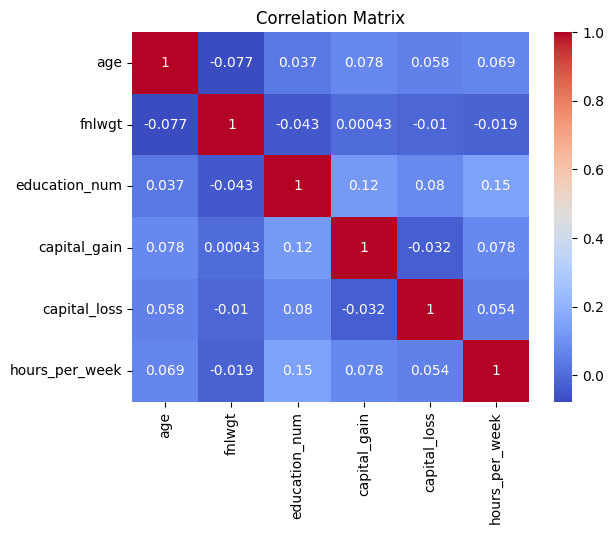

In [8]:
# Correlation matrix for numerical features
print("\nCorrelation Matrix (Numerical Features):")
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3.3. Data Visualization and Distribution Analysis

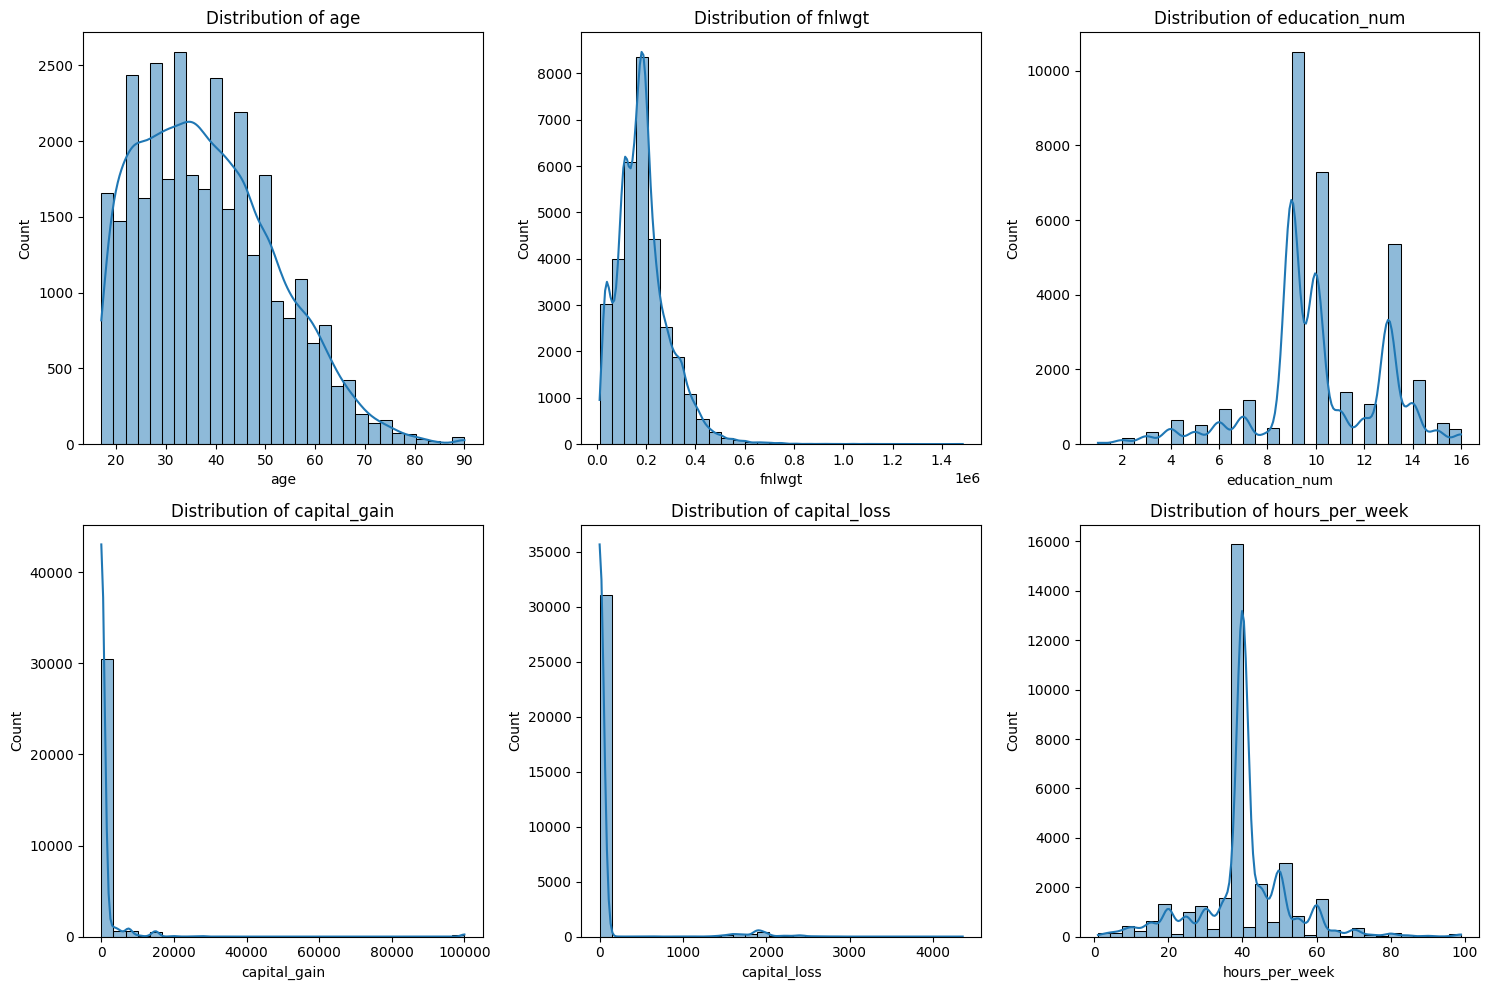

In [9]:
# Set up subplots for numerical features
# Define numerical columns
numerical_columns = data.select_dtypes(include='int64').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

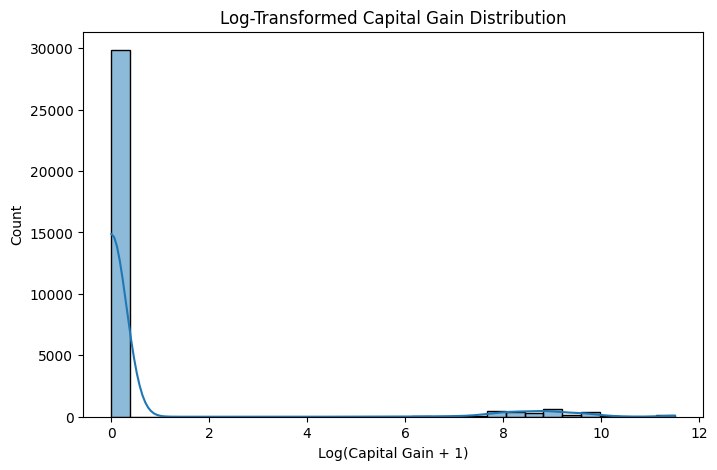

In [10]:
# Log-transformed capital_gain (due to heavy skew)
plt.figure(figsize=(8, 5))
data['log_capital_gain'] = np.log1p(data['capital_gain'])
sns.histplot(data['log_capital_gain'], bins=30, kde=True)
plt.title('Log-Transformed Capital Gain Distribution')
plt.xlabel('Log(Capital Gain + 1)')
plt.ylabel('Count')
plt.show()


Income Distribution (%):
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


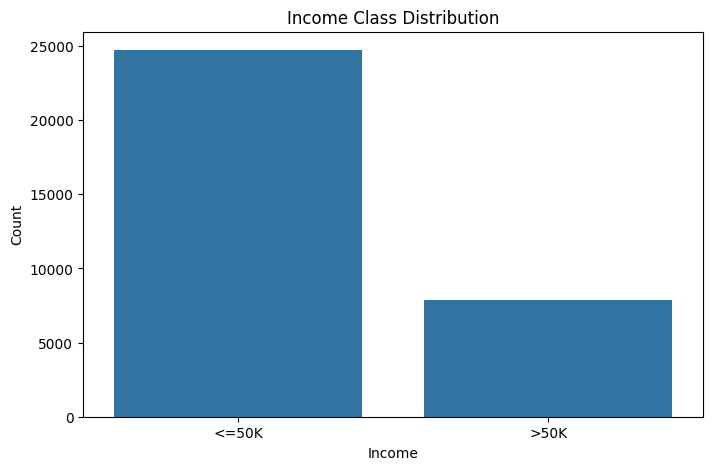

In [11]:
#Bar plot for income distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=data)
plt.title('Income Class Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
print("\nIncome Distribution (%):")
print(data['income'].value_counts(normalize=True) * 100)
plt.show()

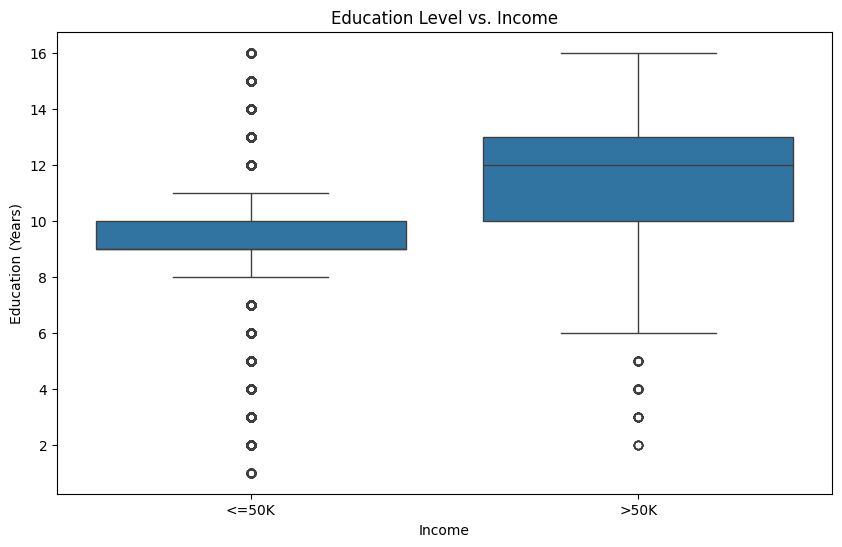

In [12]:
# Boxplot: Education_num vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education_num', data=data)
plt.title('Education Level vs. Income')
plt.xlabel('Income')
plt.ylabel('Education (Years)')
plt.show()

<Figure size 1200x600 with 0 Axes>

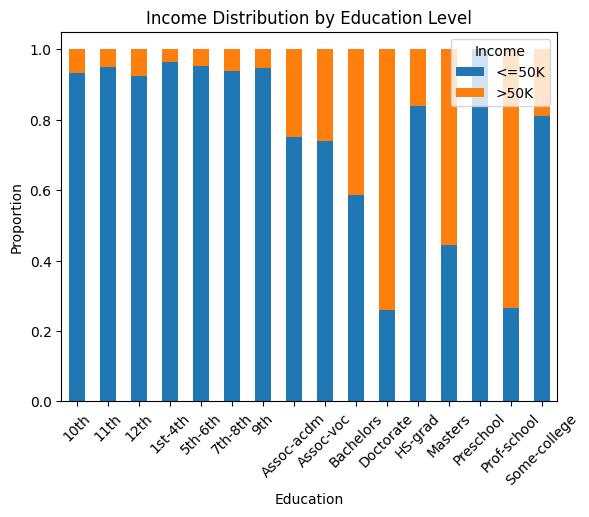

In [13]:
# Bar plot for education vs. income (proportions)
plt.figure(figsize=(12, 6))
edu_income = pd.crosstab(data['education'], data['income'], normalize='index')
edu_income.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.show()

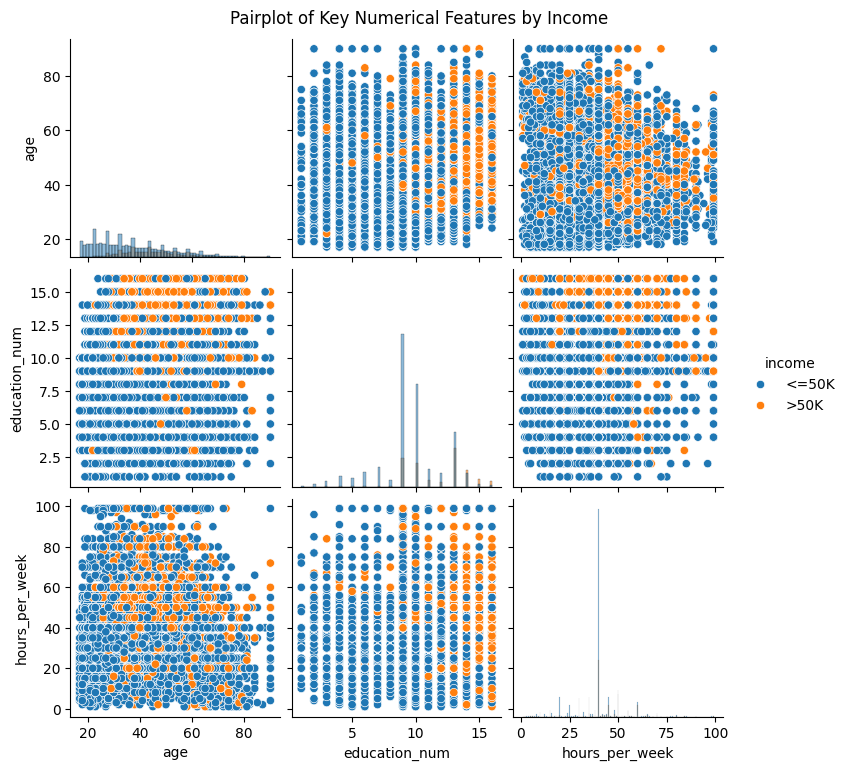

In [14]:
# Pairplot for numerical features (subset for speed)
subset_cols = ['age', 'education_num', 'hours_per_week', 'income']
sns.pairplot(data[subset_cols], hue='income', diag_kind='hist')
plt.suptitle('Pairplot of Key Numerical Features by Income', y=1.02)
plt.show()

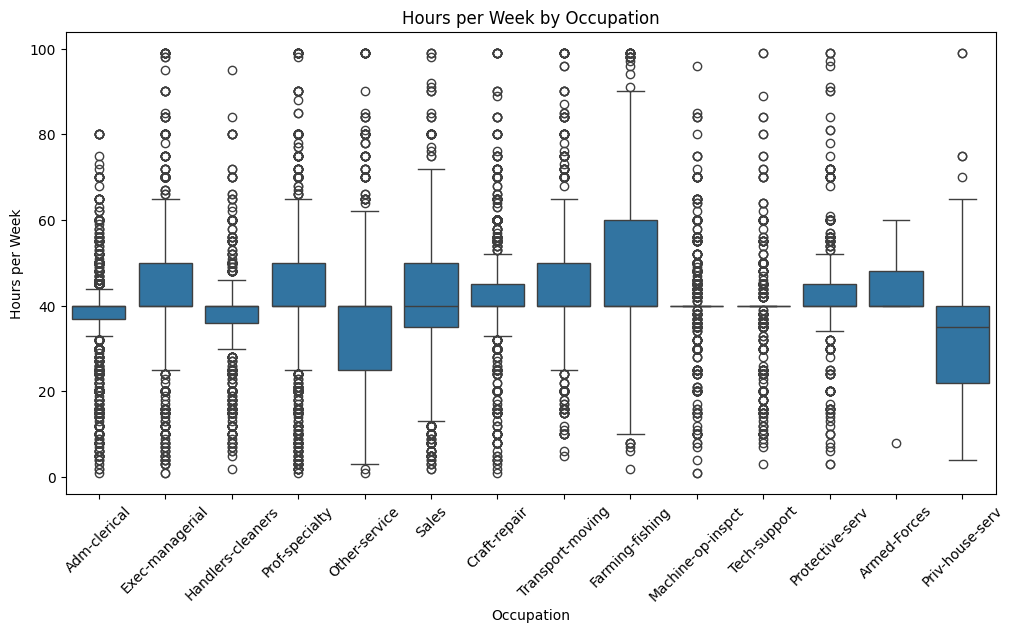

In [15]:
# Boxplot for hours_per_week by occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='occupation', y='hours_per_week', data=data)
plt.title('Hours per Week by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()

In [16]:
# 6. Key Insights
print("\nKey EDA Insights:")
print("- Age is right-skewed, with most individuals aged 20-50.")
print("- Capital_gain and capital_loss are heavily zero-inflated; log-transformation helps.")
print("- Income is imbalanced (~76% <=50K, ~24% >50K).")
print("- Higher education_num correlates with >50K income.")
print("- Missing values in workclass (~5.6%), occupation (~5.7%), native_country (~1.8%).")
print("- Hours_per_week peaks at 40, with outliers at 1 and 99.")


Key EDA Insights:
- Age is right-skewed, with most individuals aged 20-50.
- Capital_gain and capital_loss are heavily zero-inflated; log-transformation helps.
- Income is imbalanced (~76% <=50K, ~24% >50K).
- Higher education_num correlates with >50K income.
- Missing values in workclass (~5.6%), occupation (~5.7%), native_country (~1.8%).
- Hours_per_week peaks at 40, with outliers at 1 and 99.


## 4. Data Preprocessing

### 4.1. Missing Values Handling

In [17]:
# Check missing values
print("\nMissing Values Before Imputation:")
print(data.isnull().sum())


Missing Values Before Imputation:
age                    0
workclass           1836
fnlwgt                 0
education              0
education_num          0
marital_status         0
occupation          1843
relationship           0
race                   0
sex                    0
capital_gain           0
capital_loss           0
hours_per_week         0
native_country       583
income                 0
log_capital_gain       0
dtype: int64


In [18]:
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [19]:
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [20]:
data['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [21]:
# Filling missing values with mode for 'workclass' and 'native.country', and 'null' for 'occupation'
def data_fillna(data):
    data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
    data['occupation'] = data['occupation'].fillna("null")
    data['native_country'] = data["native_country"].fillna(data['native_country'].mode()[0])
    return data

data = data_fillna(data)

data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
log_capital_gain    0
dtype: int64

### 4.2. Feature Engineering

In [22]:
# Create net capital gain feature (capital_gain - capital_loss)
data['capital_net'] = data['capital_gain'] - data['capital_loss']

####  Combining low-frequency Features’Categories

In [23]:
# Group sparse categories in 'native_country' (countries with <1% frequency -> 'Other')
country_counts = data['native_country'].value_counts(normalize=True)
data['native_country_grouped'] = data['native_country'].apply(lambda x: x if country_counts[x] > 0.01 else 'Other')
data['native_country_grouped'].value_counts()


native_country_grouped
United-States    29753
Other             2165
Mexico             643
Name: count, dtype: int64

In [24]:
# Group marital_status into broader categories
data['marital_group'] = data['marital_status'].replace({
    'Married-civ-spouse': 'Married', 'Married-AF-spouse': 'Married',
    'Never-married': 'Single', 'Divorced': 'Single', 'Separated': 'Single',
    'Widowed': 'Single', 'Married-spouse-absent': 'Single'
})

#### Removing Redundant Features

In [25]:
# Dropping 'education' column
data = data.drop(columns='education')

# Drop original columns after engineering (to avoid redundancy)
data = data.drop(['capital_gain', 'capital_loss', 'marital_status', 'native_country'], axis=1)

### 4.3. Categorical Data Management

In [26]:
# Converting the 'income' target column to binary (0 for <=50K, 1 for >50K)
data['income'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [27]:
# Define categorical columns
categorical_columns = data.select_dtypes(include='object').columns

In [28]:
data[categorical_columns].describe()

,workclass,occupation,relationship,race,sex,native_country_grouped,marital_group
count,32561,32561,32561,32561,32561,32561,32561
unique,8,15,6,5,2,3,2
top,Private,Prof-specialty,Husband,White,Male,United-States,Single
freq,24532,4140,13193,27816,21790,29753,17562


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32561 non-null  int64  
 1   workclass               32561 non-null  object 
 2   fnlwgt                  32561 non-null  int64  
 3   education_num           32561 non-null  int64  
 4   occupation              32561 non-null  object 
 5   relationship            32561 non-null  object 
 6   race                    32561 non-null  object 
 7   sex                     32561 non-null  object 
 8   hours_per_week          32561 non-null  int64  
 9   income                  32561 non-null  int64  
 10  log_capital_gain        32561 non-null  float64
 11  capital_net             32561 non-null  int64  
 12  native_country_grouped  32561 non-null  object 
 13  marital_group           32561 non-null  object 
dtypes: float64(1), int64(6), object(7)
mem

In [30]:
data['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [31]:
# Encoding the other categorical features using and One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("\nDataset Shape After Encoding:")
data_encoded.info()


Dataset Shape After Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   32561 non-null  int64  
 1   fnlwgt                                32561 non-null  int64  
 2   education_num                         32561 non-null  int64  
 3   hours_per_week                        32561 non-null  int64  
 4   income                                32561 non-null  int64  
 5   log_capital_gain                      32561 non-null  float64
 6   capital_net                           32561 non-null  int64  
 7   workclass_Local-gov                   32561 non-null  bool   
 8   workclass_Never-worked                32561 non-null  bool   
 9   workclass_Private                     32561 non-null  bool   
 10  workclass_Self-emp-inc                32561 non-nul

In [32]:
data_encoded['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

### 4.4. Useless Column Suppression

In [33]:
# Drop 'fnlwgt' (sampling weight, low predictive value based on EDA correlations)
data_encoded = data_encoded.drop('fnlwgt', axis=1)

### 4.5. Normalization

In [34]:
# Scaling numerical features using MinMaxScaler
# Define numerical columns (post-engineering)
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('income')

scaler = MinMaxScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

data_encoded

,age,education_num,hours_per_week,income,log_capital_gain,capital_net,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_grouped_Other,native_country_grouped_United-States,marital_group_Single
0,0.301370,0.800000,0.397959,0,0.667492,0.062575,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
1,0.452055,0.800000,0.122449,0,0.000000,0.041742,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,0.287671,0.533333,0.397959,0,0.000000,0.041742,False,False,True,False,...,False,False,False,False,False,True,True,False,True,True
3,0.493151,0.400000,0.397959,0,0.000000,0.041742,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
4,0.150685,0.800000,0.397959,0,0.000000,0.041742,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,0,0.000000,0.041742,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
32557,0.315068,0.533333,0.397959,1,0.000000,0.041742,False,False,True,False,...,False,False,False,False,False,True,True,False,True,False
32558,0.561644,0.533333,0.397959,0,0.000000,0.041742,False,False,True,False,...,True,False,False,False,False,True,False,False,True,True
32559,0.068493,0.533333,0.193878,0,0.000000,0.041742,False,False,True,False,...,False,False,False,False,False,True,True,False,True,True


### 4.6. Outliner Handling

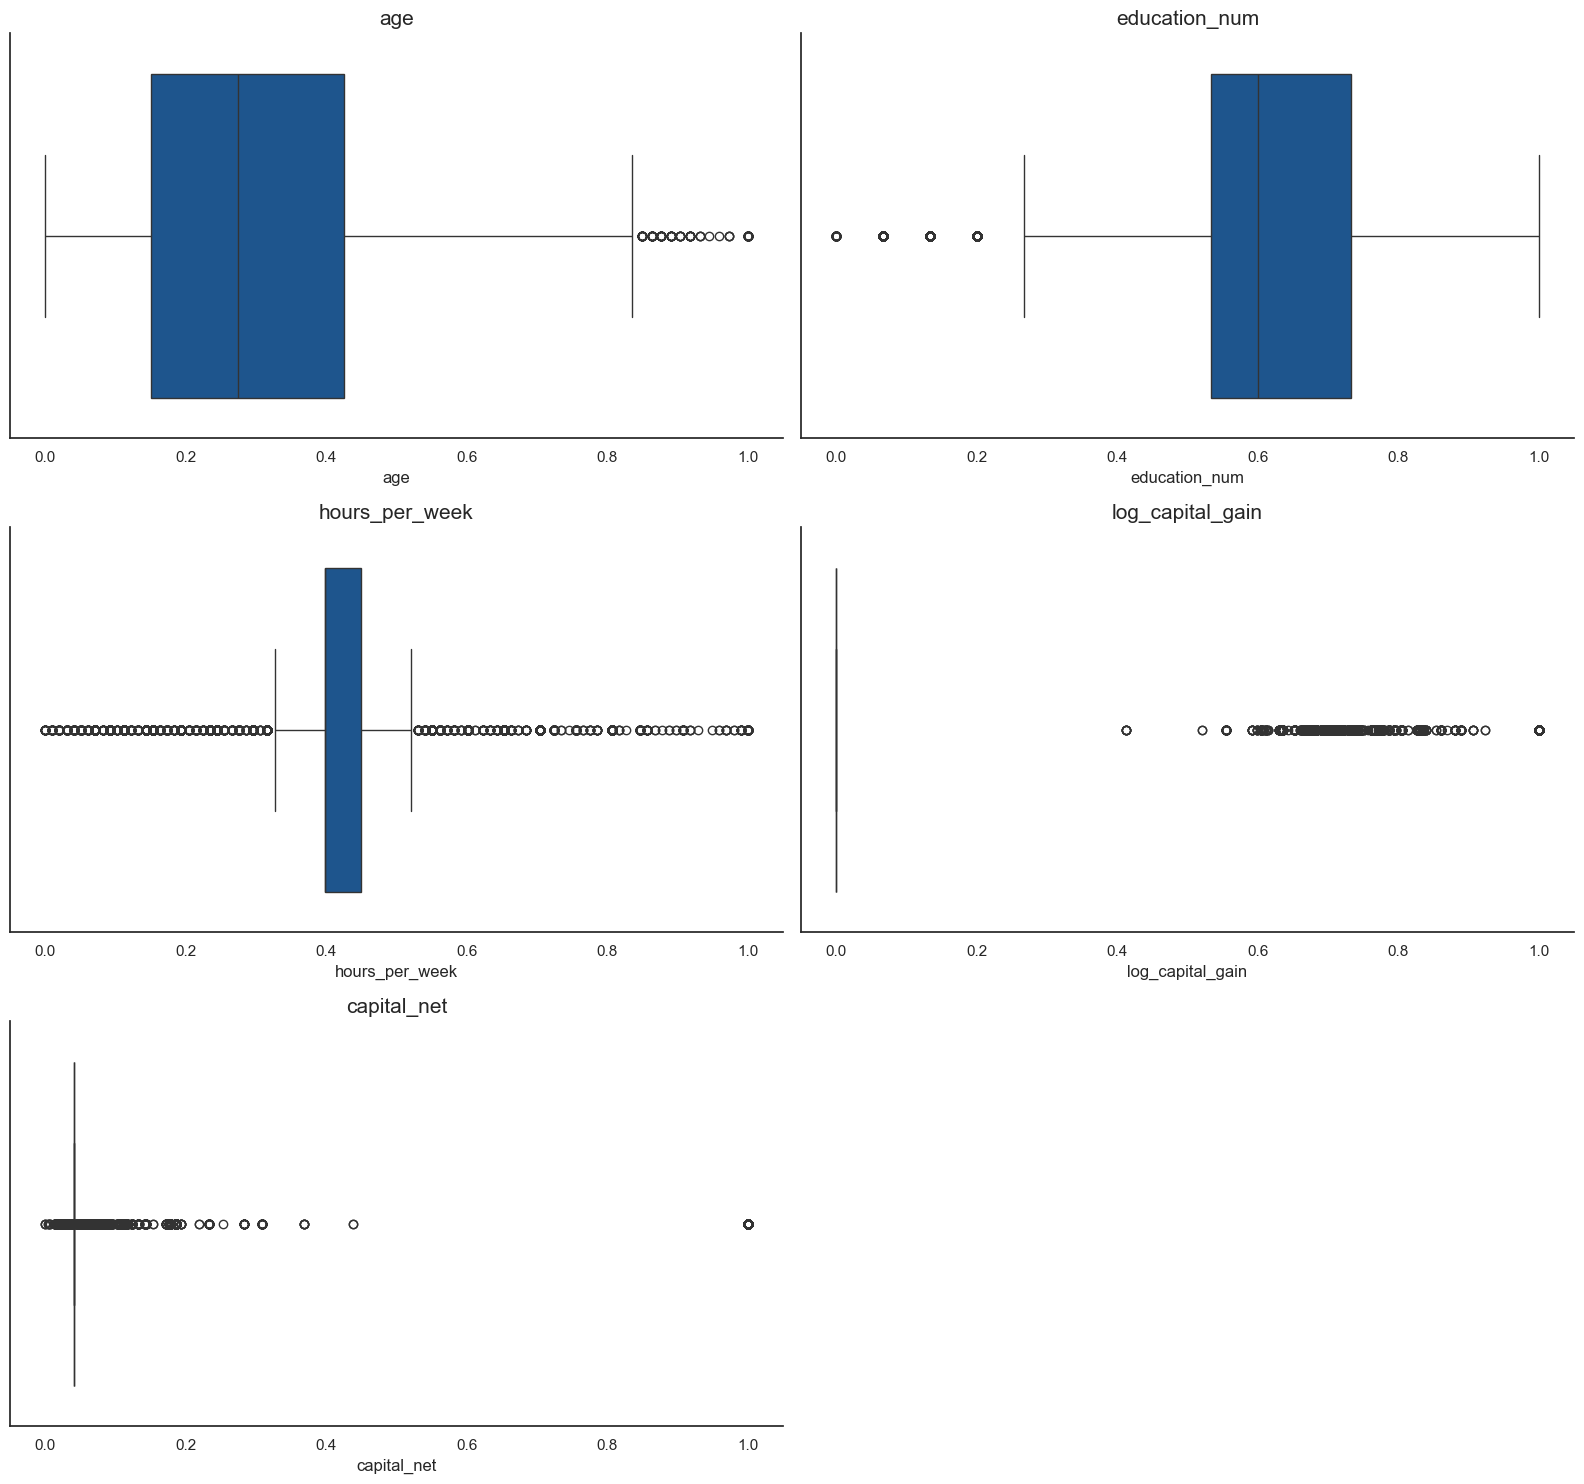

In [35]:
# Visualizing boxplots for numerical features to detect outliers
sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("Blues_r")
num_cols = len(numerical_columns)
rows = math.ceil(num_cols / 2)

plt.figure(figsize=(16, 5 * rows))

for i, column in enumerate(data_encoded[numerical_columns], 1):
    plt.subplot(rows, 2, i)
    ax1 = sns.boxplot(x=data_encoded[column])
    ax1.set_title(str(column), fontsize=15)

sns.despine()
plt.tight_layout()
plt.show()

In [36]:
# Cap extreme values in 'capital_net' (e.g., using 99th percentile to reduce outlier impact)
cap_threshold = data_encoded['capital_net'].quantile(0.99)
data_encoded['capital_net'] = data_encoded['capital_net'].clip(upper=cap_threshold)

In [37]:
# Function to find outliers and remove them
def find_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3-q1
    floor = q1-1.5*iqr
    ceiling = q3+1.5*iqr
    outliers_indexes = list(column.index[(column<floor) | (column>ceiling)])
    outliers_values = list(column[outliers_indexes])

    return floor, ceiling, outliers_values

for column in data_encoded[numerical_columns]:
    print(column+'\n')
    floor, ceiling, values = find_outliers(data_encoded[column])
    print(floor, '---', ceiling)
    print('\n size: ', len(values), '\n')

age

-0.2602739726027397 --- 0.8356164383561644

 size:  143 

education_num

0.23333333333333323 --- 1.0333333333333334

 size:  1198 

hours_per_week

0.3214285714285714 --- 0.5255102040816326

 size:  9008 

log_capital_gain

0.0 --- 0.0

 size:  2712 

capital_net

0.04174213022854679 --- 0.04174213022854679

 size:  4231 



In [38]:
# Removing outliers from 'age' feature
data_encoded = data_encoded[((data_encoded['age']>=floor) | (data_encoded['age']<=ceiling))]
data_encoded

,age,education_num,hours_per_week,income,log_capital_gain,capital_net,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_grouped_Other,native_country_grouped_United-States,marital_group_Single
0,0.301370,0.800000,0.397959,0,0.667492,0.062575,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
1,0.452055,0.800000,0.122449,0,0.000000,0.041742,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,0.287671,0.533333,0.397959,0,0.000000,0.041742,False,False,True,False,...,False,False,False,False,False,True,True,False,True,True
3,0.493151,0.400000,0.397959,0,0.000000,0.041742,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
4,0.150685,0.800000,0.397959,0,0.000000,0.041742,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,0,0.000000,0.041742,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
32557,0.315068,0.533333,0.397959,1,0.000000,0.041742,False,False,True,False,...,False,False,False,False,False,True,True,False,True,False
32558,0.561644,0.533333,0.397959,0,0.000000,0.041742,False,False,True,False,...,True,False,False,False,False,True,False,False,True,True
32559,0.068493,0.533333,0.193878,0,0.000000,0.041742,False,False,True,False,...,False,False,False,False,False,True,True,False,True,True


In [39]:
# Log-transform 'capital_net' to reduce skewness (add 1 to handle zeros/negatives)
data_encoded['capital_net'] = np.log1p(data_encoded['capital_net'].clip(lower=0))

In [40]:
# Final dataset overview
print("\nFinal Dataset Head:")
print(data_encoded.head())
print("\nFinal Dataset Shape:", data_encoded.shape)


Final Dataset Head:
        age  education_num  hours_per_week  income  log_capital_gain  \
0  0.301370       0.800000        0.397959       0          0.667492   
1  0.452055       0.800000        0.122449       0          0.000000   
2  0.287671       0.533333        0.397959       0          0.000000   
3  0.493151       0.400000        0.397959       0          0.000000   
4  0.150685       0.800000        0.397959       0          0.000000   

   capital_net  workclass_Local-gov  workclass_Never-worked  \
0     0.060695                False                   False   
1     0.040894                False                   False   
2     0.040894                False                   False   
3     0.040894                False                   False   
4     0.040894                False                   False   

   workclass_Private  workclass_Self-emp-inc  ...  relationship_Unmarried  \
0              False                   False  ...                   False   
1            

### 4.7. Save preprocessed data to CSV


In [41]:
data_encoded.to_csv('adult_preprocessed.csv', index=False)
print("\nPreprocessed data saved to 'adult_preprocessed.csv'")


Preprocessed data saved to 'adult_preprocessed.csv'


## 5. Training Classifiers and Evaluation

### 5.1. Load Preprocessed Data

In [42]:
data = pd.read_csv('adult_preprocessed.csv')
print("Dataset Shape:", data.shape)
print("\nDataset Head:")
print(data.head())

Dataset Shape: (32561, 40)

Dataset Head:
        age  education_num  hours_per_week  income  log_capital_gain  \
0  0.301370       0.800000        0.397959       0          0.667492   
1  0.452055       0.800000        0.122449       0          0.000000   
2  0.287671       0.533333        0.397959       0          0.000000   
3  0.493151       0.400000        0.397959       0          0.000000   
4  0.150685       0.800000        0.397959       0          0.000000   

   capital_net  workclass_Local-gov  workclass_Never-worked  \
0     0.060695                False                   False   
1     0.040894                False                   False   
2     0.040894                False                   False   
3     0.040894                False                   False   
4     0.040894                False                   False   

   workclass_Private  workclass_Self-emp-inc  ...  relationship_Unmarried  \
0              False                   False  ...                   F

In [43]:
# Define features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

In [44]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (26048, 39)
Testing Set Shape: (6513, 39)


### 5.2. Initialize Models


In [45]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'SVM': svm.SVC(kernel='linear', C=1, random_state=42, probability=True),
    'Decision Tree': tree.DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

### 5.3. Train and Evaluate Models


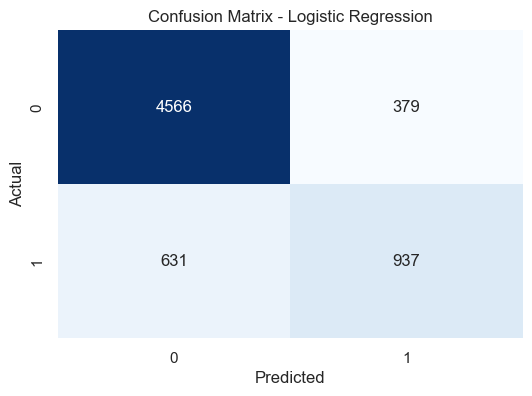

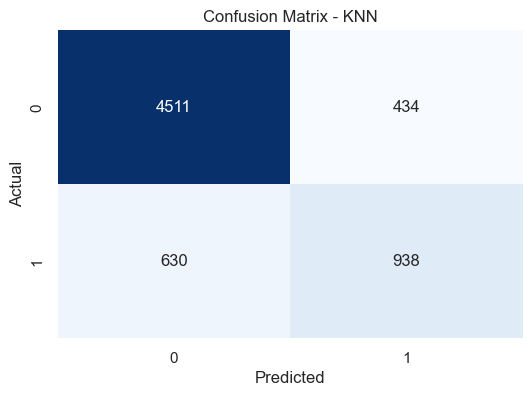

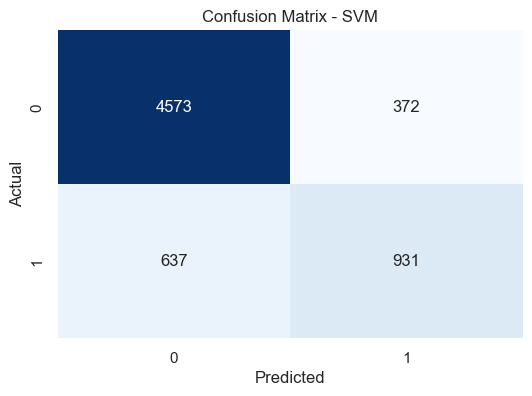

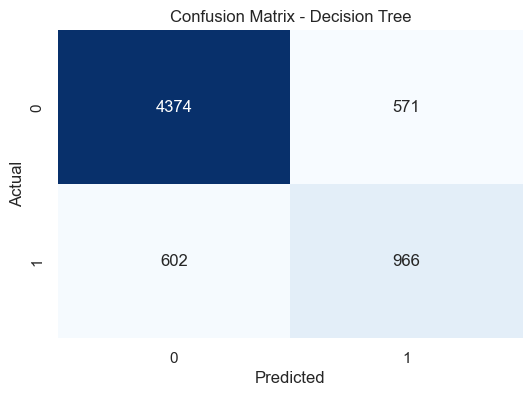

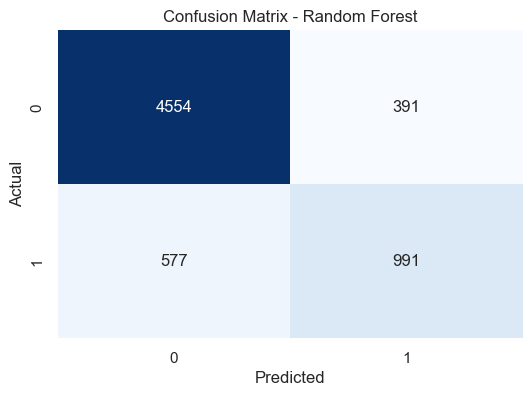

In [46]:
results = []
roc_data = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate probabilities if available
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        print(f"Warning: {name} does not support predict_proba. Skipping AUC-ROC.")
        y_prob = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    })

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[name] = (fpr, tpr)

    # Save model for web app
    with open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 5.4. Display Results


In [47]:
results_data = pd.DataFrame(results)
print("\nModel Performance Metrics:")
print(results_data)


Model Performance Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.844926   0.712006  0.597577  0.649792  0.900504
1                  KNN  0.836634   0.683673  0.598214  0.638095  0.870042
2                  SVM  0.845079   0.714505  0.593750  0.648555  0.897998
3        Decision Tree  0.819899   0.628497  0.616071  0.622222  0.769968
4        Random Forest  0.851374   0.717077  0.632015  0.671864  0.899674


###5.5. Plot ROC Curves


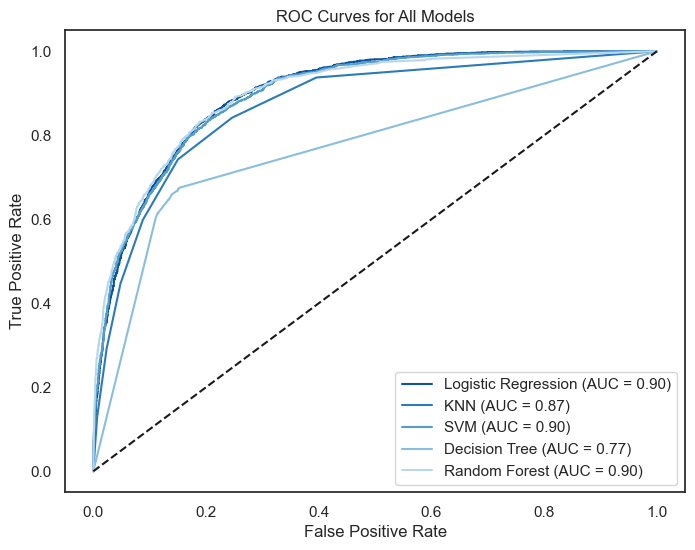

In [48]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results_data[results_data["Model"] == name]["AUC-ROC"].values[0]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

### 5.6. Feature Importance (for Decision Tree and Random Forest)


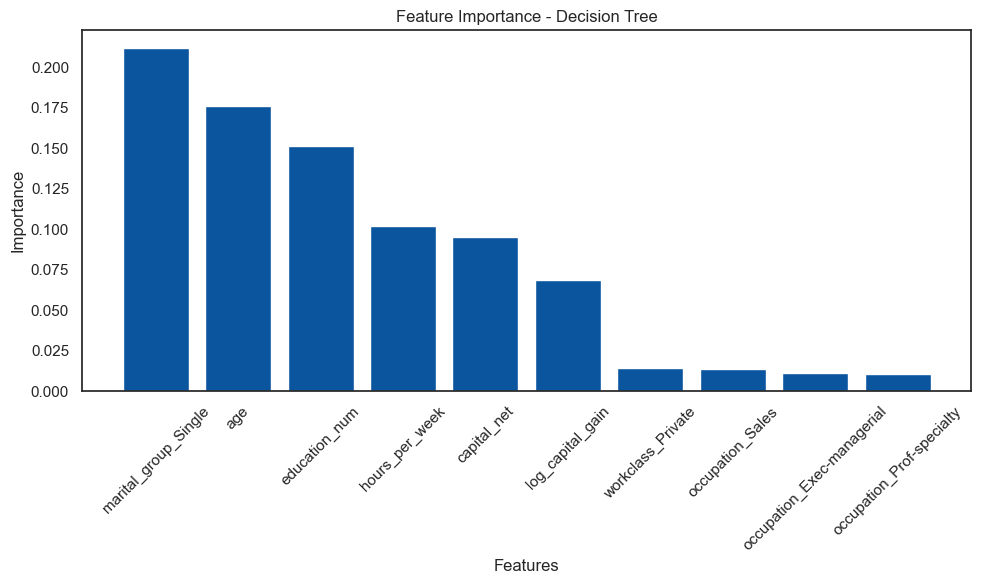

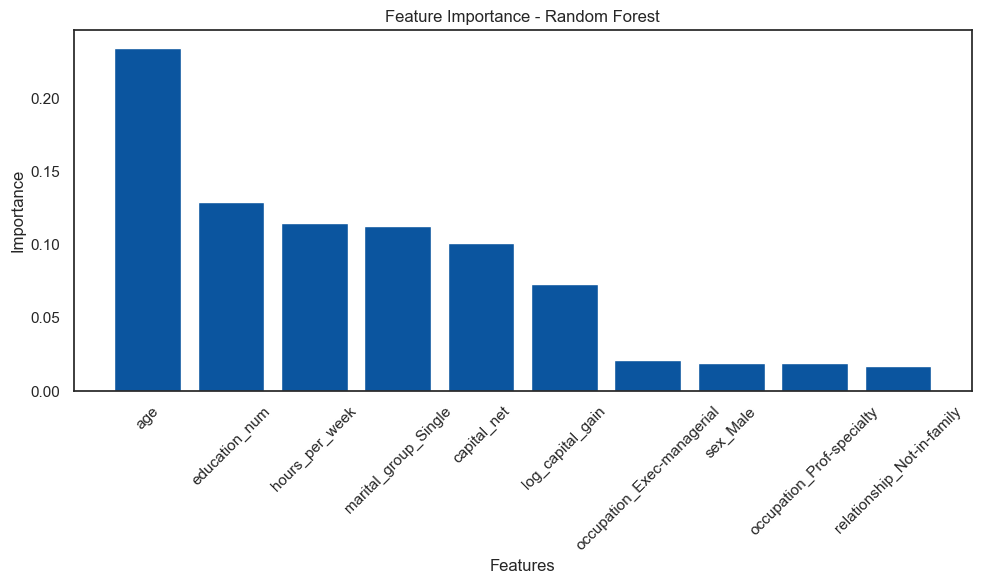

In [49]:
for name, model in models.items():
    if name in ['Decision Tree', 'Random Forest']:
        plt.figure(figsize=(10, 6))
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1][:10]  # Top 10 features
        plt.bar(range(10), importances[indices], align='center')
        plt.xticks(range(10), X.columns[indices], rotation=45)
        plt.title(f'Feature Importance - {name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

### 5.7. Save Results for Web App


In [50]:
results_data.to_csv('model_results.csv', index=False)
print("\nModel results saved to 'model_results.csv'")


Model results saved to 'model_results.csv'


## 6. Mini Web Application with an Interactive Interface Development

In [61]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm

import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set page configuration
st.set_page_config(page_title="Adult Census Income Prediction with SHAP", layout="wide")

# Initialize session state
if 'data_loaded' not in st.session_state:
    st.session_state.data_loaded = False
if 'models_trained' not in st.session_state:
    st.session_state.models_trained = False

# Title and description
st.title("🎯 Adult Census Income Prediction with Model Interpretation")
st.markdown("""
This app predicts income (>50K or <=50K) using machine learning models and provides SHAP explanations.
Use the sidebar to configure the dataset, train models, and make predictions.
""")

# Sidebar for dataset selection and upload
st.sidebar.header("📊 Dataset Configuration")
use_default = st.sidebar.checkbox("Use Default Adult Dataset", value=True)

# Function to load default data
@st.cache_data
def load_default_data():
    try:
        df_default = pd.read_csv('adult_preprocessed.csv')
        results_default = pd.read_csv('model_results.csv')
        return df_default, results_default, True
    except FileNotFoundError as e:
        st.error(f"❌ Error loading default dataset: {e}")
        return None, None, False

# Function to load models
@st.cache_resource
def load_default_models():
    try:
        models_dict = {
            'Logistic Regression': pickle.load(open('logistic_regression_model.pkl', 'rb')),
            'K-Nearest Neighbors': pickle.load(open('knn_model.pkl', 'rb')),
            'SVM': pickle.load(open('svm_model.pkl', 'rb')),
            'Random Forest': pickle.load(open('random_forest_model.pkl', 'rb')),
            'Decision Tree': pickle.load(open('decision_tree_model.pkl', 'rb')),
        }
        return models_dict, True
    except FileNotFoundError as e:
        st.error(f"❌ Error loading models: {e}")
        return {}, False

# Function to process and train on uploaded dataset
@st.cache_data
def process_and_train_uploaded(df, target_column):
    try:
        # Check if target is binary
        if df[target_column].nunique() != 2:
            st.error("Target feature must be binary (2 unique values)")
            return None, None, None, None, None, {}

        # Label encode target
        le = LabelEncoder()
        y = le.fit_transform(df[target_column])
        target_classes = le.classes_

        X = df.drop(target_column, axis=1)

        # Identify numerical and categorical columns
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

        # Preprocessing pipeline
        numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_cols),
                ('cat', categorical_transformer, categorical_cols)
            ])

        # Fit and transform
        X_preprocessed = preprocessor.fit_transform(X)

        # Get feature names
        feature_names = numerical_cols.copy()
        if categorical_cols:
            cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
            feature_names.extend(cat_features.tolist())

        X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_preprocessed, y, test_size=0.2, random_state=42, stratify=y
        )

        # Train models
        models_dict = {
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
            'SVM': svm.SVC(kernel='linear', C=1, random_state=42, probability=True),
            'Decision Tree': tree.DecisionTreeClassifier(random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
        }

        results_list = []
        trained_models = {}

        progress_bar = st.progress(0)
        status_text = st.empty()

        for idx, (name, model) in enumerate(models_dict.items()):
            status_text.text(f"Training {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]

            # Metrics
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_score = auc(fpr, tpr)

            results_list.append({
                'Model': name,
                'Accuracy': report['accuracy'],
                'Precision': report['weighted avg']['precision'],
                'Recall': report['weighted avg']['recall'],
                'F1-Score': report['weighted avg']['f1-score'],
                'AUC-ROC': auc_score
            })

            trained_models[name] = model
            progress_bar.progress((idx + 1) / len(models_dict))

        status_text.text("✅ Training complete!")
        progress_bar.empty()
        status_text.empty()

        results_df = pd.DataFrame(results_list)

        # Store train/test split for later use
        split_data = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'X_preprocessed': X_preprocessed,
            'y': y
        }

        return X_preprocessed, y, results_df, trained_models, split_data, {
            'numerical_cols': numerical_cols,
            'categorical_cols': categorical_cols,
            'target_classes': target_classes
        }
    except Exception as e:
        st.error(f"❌ Error processing dataset: {str(e)}")
        return None, None, None, None, None, {}

# Load data based on selection
if use_default:
    df, results, success = load_default_data()
    if success:
        models, model_success = load_default_models()
        if model_success:
            st.sidebar.success("✅ Default dataset and models loaded")
            target_column = 'income'
            st.session_state.data_loaded = True
            st.session_state.models_trained = True

            # Create split data for default dataset
            X = df.drop(target_column, axis=1)
            y = df[target_column]
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, stratify=y
            )
            split_data = {
                'X_train': X_train,
                'X_test': X_test,
                'y_train': y_train,
                'y_test': y_test,
                'X_preprocessed': X,
                'y': y
            }
            metadata = {'target_classes': [0, 1]}
        else:
            st.stop()
    else:
        st.stop()
else:
    uploaded_file = st.sidebar.file_uploader("📁 Upload CSV dataset", type="csv")
    if uploaded_file is not None:
        try:
            df = pd.read_csv(uploaded_file)
            st.sidebar.success(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

            # Display dataset info
            with st.expander("📋 View Dataset Information"):
                col1, col2, col3 = st.columns(3)
                with col1:
                    st.metric("Rows", df.shape[0])
                with col2:
                    st.metric("Columns", df.shape[1])
                with col3:
                    st.metric("Missing Values", df.isnull().sum().sum())

                st.subheader("Data Preview")
                st.dataframe(df.head(10))

                st.subheader("Data Types")
                st.dataframe(pd.DataFrame({
                    'Column': df.columns,
                    'Type': df.dtypes.astype(str),
                    'Non-Null': df.count().values,
                    'Unique': [df[col].nunique() for col in df.columns]
                }))

            # Choose target feature
            target_column = st.sidebar.selectbox(
                "🎯 Select Target Feature (binary)",
                df.columns,
                help="Choose the column you want to predict (must have exactly 2 unique values)"
            )

            if target_column:
                st.sidebar.info(f"Target: {target_column}\nUnique values: {df[target_column].nunique()}")

                if st.sidebar.button("🚀 Train Models", type="primary"):
                    with st.spinner("Training models..."):
                        X, y, results, models, split_data, metadata = process_and_train_uploaded(df, target_column)
                        if X is not None:
                            df = pd.concat([X, pd.Series(y, name=target_column)], axis=1)
                            st.session_state.data_loaded = True
                            st.session_state.models_trained = True
                            st.sidebar.success("✅ Models trained successfully!")
                        else:
                            st.stop()
                else:
                    st.info("👈 Please click 'Train Models' in the sidebar to begin")
                    st.stop()
        except Exception as e:
            st.error(f"❌ Error loading dataset: {str(e)}")
            st.stop()
    else:
        st.info("👈 Please upload a CSV file to begin")
        st.stop()

# Check if data is loaded
if not st.session_state.data_loaded:
    st.warning("⚠️ No dataset loaded. Please configure the dataset in the sidebar.")
    st.stop()

# Model Performance Section
st.header("📊 Model Performance Comparison")
if results is not None and not results.empty:
    col1, col2 = st.columns([2, 1])

    with col1:
        st.dataframe(
            results.style.format({
                'Accuracy': '{:.2%}',
                'Precision': '{:.2%}',
                'Recall': '{:.2%}',
                'F1-Score': '{:.2%}',
                'AUC-ROC': '{:.4f}'
            }).background_gradient(cmap='RdYlGn', subset=['Accuracy', 'AUC-ROC']),
            use_container_width=True
        )

    with col2:
        best_model = results.loc[results['AUC-ROC'].idxmax(), 'Model']
        best_auc = results.loc[results['AUC-ROC'].idxmax(), 'AUC-ROC']
        st.metric("🏆 Best Model", best_model, f"AUC: {best_auc:.4f}")

        avg_accuracy = results['Accuracy'].mean()
        st.metric("📈 Average Accuracy", f"{avg_accuracy:.2%}")

# ROC Curves
st.header("📈 ROC Curves Comparison")
try:
    fig = go.Figure()
    for name in models:
        model = models[name]
        y_prob = model.predict_proba(split_data['X_test'])[:, 1]
        fpr, tpr, _ = roc_curve(split_data['y_test'], y_prob)
        auc_score = auc(fpr, tpr)
        fig.add_trace(go.Scatter(
            x=fpr, y=tpr,
            name=f'{name} (AUC = {auc_score:.3f})',
            mode='lines',
            line=dict(width=2)
        ))

    fig.add_trace(go.Scatter(
        x=[0, 1], y=[0, 1],
        line=dict(dash='dash', color='gray', width=1),
        name='Random Classifier',
        showlegend=True
    ))

    fig.update_layout(
        title="Receiver Operating Characteristic (ROC) Curves",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        legend=dict(x=0.6, y=0.1),
        hovermode='closest',
        width=None,
        height=500
    )
    st.plotly_chart(fig, use_container_width=True)
except Exception as e:
    st.error(f"Error generating ROC curves: {str(e)}")

# Prediction Section
st.header("🔮 Make Predictions")
st.sidebar.header("🎛️ Prediction Settings")

# Model selection
model_name = st.sidebar.selectbox("Select Model", list(models.keys()))

# Dynamic user input based on available features
st.sidebar.subheader("Input Features")

def get_user_input_dynamic(df, target_col):
    """Generate dynamic input based on available features"""
    input_data = {}
    feature_cols = [col for col in df.columns if col != target_col]

    # Limit to first 10 features for UI simplicity
    display_features = feature_cols[:min(10, len(feature_cols))]

    for col in display_features:
        if df[col].dtype in ['int64', 'float64']:
            min_val = float(df[col].min())
            max_val = float(df[col].max())
            mean_val = float(df[col].mean())
            input_data[col] = st.sidebar.slider(
                col.replace('_', ' ').title(),
                min_val, max_val, mean_val
            )
        else:
            # For one-hot encoded features, set to 0 by default
            input_data[col] = 0

    # Fill remaining features with 0
    for col in feature_cols:
        if col not in input_data:
            input_data[col] = 0

    return pd.DataFrame([input_data])[feature_cols]

user_input = get_user_input_dynamic(df, target_column)

# Prediction button
if st.sidebar.button("🎯 Predict", type="primary"):
    try:
        model = models[model_name]

        # Predict
        prediction = model.predict(user_input)[0]
        probability = model.predict_proba(user_input)[0]

        # Display results
        col1, col2, col3 = st.columns(3)

        with col1:
            result_label = "High Income (>50K)" if prediction == 1 else "Low Income (<=50K)"
            st.metric("Prediction", result_label)

        with col2:
            st.metric("Confidence", f"{probability[prediction]:.1%}")

        with col3:
            st.metric("Model", model_name)

        # Probability distribution
        fig_prob = go.Figure(data=[
            go.Bar(
                x=['Class 0', 'Class 1'],
                y=probability,
                marker_color=['#FF6B6B', '#4ECDC4'],
                text=[f'{p:.1%}' for p in probability],
                textposition='auto',
            )
        ])
        fig_prob.update_layout(
            title="Class Probability Distribution",
            yaxis_title="Probability",
            showlegend=False,
            height=300
        )
        st.plotly_chart(fig_prob, use_container_width=True)

        # SHAP Explanation
        st.subheader("🔍 SHAP Feature Importance Explanation")

        with st.spinner("Generating SHAP values..."):
            try:
                if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier)):
                    explainer = shap.TreeExplainer(model)
                    shap_values = explainer.shap_values(user_input)
                    base_value = explainer.expected_value
                    # Handle multi-output models
                    if isinstance(shap_values, list):
                        # For binary classification, select the positive class (index 1)
                        shap_values = shap_values[1]
                        base_value = base_value[1] if isinstance(base_value, (list, np.ndarray)) else base_value
                    elif isinstance(shap_values, np.ndarray) and len(shap_values.shape) > 2:
                        # For multi-output arrays, select the positive class (index 1)
                        shap_values = shap_values[:, :, 1]
                        base_value = base_value[1] if isinstance(base_value, (list, np.ndarray)) else base_value
                else:
                    # Use a smaller background dataset for KernelExplainer
                    background = shap.sample(split_data['X_train'], 50)
                    explainer = shap.KernelExplainer(model.predict_proba, background)
                    shap_values = explainer.shap_values(user_input)
                    base_value = explainer.expected_value
                    # Handle multi-output models
                    if isinstance(shap_values, list):
                        # For binary classification, select the positive class (index 1)
                        shap_values = shap_values[1]
                        base_value = base_value[1] if isinstance(base_value, (list, np.ndarray)) else base_value
                    elif isinstance(shap_values, np.ndarray) and len(shap_values.shape) > 2:
                        # For multi-output arrays, select the positive class (index 1)
                        shap_values = shap_values[:, :, 1]
                        base_value = base_value[1] if isinstance(base_value, (list, np.ndarray)) else base_value

                # Ensure shap_values is for a single instance
                if len(shap_values.shape) > 1:
                    if shap_values.shape[0] > 1:
                        shap_values = shap_values[0]  # Select first instance
                    else:
                        shap_values = shap_values[0]  # Flatten if only one instance

                # Ensure base_value is a scalar
                if isinstance(base_value, (list, np.ndarray)):
                    if len(base_value) > 1:
                        base_value = float(base_value[0])  # Select first value and convert to scalar
                    else:
                        base_value = float(base_value[0])  # Flatten to scalar
                else:
                    base_value = float(base_value)  # Ensure scalar

                # Waterfall plot
                st.write("**Feature Impact on Prediction:**")
                fig, ax = plt.subplots(figsize=(10, 6))
                shap.plots.waterfall(
                    shap.Explanation(
                        values=shap_values,
                        base_values=base_value,
                        data=user_input.iloc[0],
                        feature_names=user_input.columns.tolist()
                    ),
                    show=False
                )
                st.pyplot(fig)
                plt.close()

            except Exception as e:
                st.warning(f"Could not generate SHAP explanation: {str(e)}")

    except Exception as e:
        st.error(f"Prediction error: {str(e)}")

# Additional Analysis
st.header("📊 Detailed Model Analysis")

analysis_tabs = st.tabs(["Confusion Matrix", "Classification Report", "Precision-Recall", "Feature Importance"])

with analysis_tabs[0]:
    selected_model_cm = st.selectbox("Select model for confusion matrix", list(models.keys()), key='cm_model')
    if st.button("Generate Confusion Matrix"):
        try:
            model = models[selected_model_cm]
            y_pred = model.predict(split_data['X_test'])

            cm = confusion_matrix(split_data['y_test'], y_pred)

            fig, ax = plt.subplots(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                       xticklabels=['Class 0', 'Class 1'],
                       yticklabels=['Class 0', 'Class 1'])
            ax.set_xlabel('Predicted Label')
            ax.set_ylabel('True Label')
            ax.set_title(f'Confusion Matrix - {selected_model_cm}')
            st.pyplot(fig)
            plt.close()

            # Display metrics
            col1, col2, col3, col4 = st.columns(4)
            tn, fp, fn, tp = cm.ravel()
            with col1:
                st.metric("True Negatives", tn)
            with col2:
                st.metric("False Positives", fp)
            with col3:
                st.metric("False Negatives", fn)
            with col4:
                st.metric("True Positives", tp)
        except Exception as e:
            st.error(f"Error: {str(e)}")

with analysis_tabs[1]:
    selected_model_cr = st.selectbox("Select model for classification report", list(models.keys()), key='cr_model')
    if st.button("Generate Classification Report"):
        try:
            model = models[selected_model_cr]
            y_pred = model.predict(split_data['X_test'])

            report = classification_report(split_data['y_test'], y_pred, output_dict=True)
            report_df = pd.DataFrame(report).transpose()

            st.dataframe(
                report_df.style.format("{:.3f}").background_gradient(cmap='RdYlGn'),
                use_container_width=True
            )
        except Exception as e:
            st.error(f"Error: {str(e)}")

with analysis_tabs[2]:
    selected_model_pr = st.selectbox("Select model for precision-recall curve", list(models.keys()), key='pr_model')
    if st.button("Generate Precision-Recall Curve"):
        try:
            model = models[selected_model_pr]
            y_prob = model.predict_proba(split_data['X_test'])[:, 1]

            precision, recall, _ = precision_recall_curve(split_data['y_test'], y_prob)

            fig = go.Figure()
            fig.add_trace(go.Scatter(
                x=recall, y=precision,
                mode='lines',
                name='Precision-Recall Curve',
                fill='tozeroy',
                line=dict(color='#4ECDC4', width=2)
            ))
            fig.update_layout(
                title=f"Precision-Recall Curve - {selected_model_pr}",
                xaxis_title="Recall",
                yaxis_title="Precision",
                hovermode='closest',
                height=500
            )
            st.plotly_chart(fig, use_container_width=True)
        except Exception as e:
            st.error(f"Error: {str(e)}")

with analysis_tabs[3]:
    selected_model_fi = st.selectbox("Select model for feature importance",
                                     [m for m in models.keys() if m in ['Random Forest', 'Gradient Boosting']],
                                     key='fi_model')
    if selected_model_fi and st.button("Show Feature Importance"):
        try:
            model = models[selected_model_fi]
            if hasattr(model, 'feature_importances_'):
                feature_imp = pd.DataFrame({
                    'Feature': split_data['X_test'].columns,
                    'Importance': model.feature_importances_
                }).sort_values('Importance', ascending=False).head(20)

                fig = px.bar(feature_imp, x='Importance', y='Feature', orientation='h',
                            title=f'Top 20 Feature Importances - {selected_model_fi}')
                fig.update_layout(height=600)
                st.plotly_chart(fig, use_container_width=True)
            else:
                st.warning("Selected model does not support feature importances")
        except Exception as e:
            st.error(f"Error: {str(e)}")

# Footer with instructions
st.markdown("---")
st.markdown("""
### 📖 How to Use This App

1. **Dataset Selection**: Choose default dataset or upload your own CSV file
2. **Model Training**: If using custom data, click 'Train Models' to train classifiers
3. **View Performance**: Compare model metrics, ROC curves, and performance statistics
4. **Make Predictions**: Adjust input features in sidebar and click 'Predict'
5. **Analyze Results**: Explore confusion matrices, classification reports, and feature importance

**Supported Models**: Logistic Regression, Random Forest, Gradient Boosting, K-Nearest Neighbors

**SHAP Explanations**: Understand which features contribute most to each prediction
""")

Overwriting app.py


In [58]:
!wget -q -O - ipv4.icanhazip.com

196.176.18.239


In [ ]:
!streamlit run app.py  & npx localtunnel --port 8501